# Imports

In [1]:
!pwd
import sys
import os

from bumps.names import *
from bumps.dream.state import load_state
import matplotlib.pyplot as plt

from molgroups.support import molstat

/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/simulate_data/SASView


# Create Short Example Fit

In [9]:
%%writefile testfit.py
import numpy

from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data

# IMPORT THE DATA USED
data = load_data('testdata.DAT')

#setattr(data, 'qmin', 0.0)
#setattr(data, 'qmax', 10.0)

# DEFINE THE MODEL
kernel = load_model('ellipsoid@hayter_msa')

pars = dict(scale=6.4, background=0.06, sld=0.33, sld_solvent=2.15, radius_polar=14.0,
            radius_equatorial=24.0, volfraction=0.075, charge=66.373, temperature=298.0,
            concentration_salt=0.001, dielectconst=71.0)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0, 60.)
model.background.range(0, 1)
model.sld.range(-2, 10)
model.sld_solvent.range(0, 5)
model.radius_polar.range(0, 10)
model.radius_equatorial.range(0, 25)
model.volfraction.range(0,0.1)
model.charge.range(0, 20)
model.temperature.range(0, 1000)
model.concentration_salt.range(0, 1)
model.dielectconst.range(0,100)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting testfit.py


# Variables

In [10]:
#Example is from https://github.com/SasView/sasmodels/tree/master/example

store = "T"
setupdir = os.getcwd()
runfile = "testfit"
fitsource = "SASView"

burn=5000
steps=100

# Setup Example Fit

In [11]:
fitobj = molstat.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    state=None,
    problem=None,
)

# steps: 100, # draws: 11000
step 1 cost 140.606(52)
                              background |.........  0.0387263 in (0,1)
                                  charge ....|.....    8.41758 in (0,20)
                      concentration_salt ....|.....   0.400446 in (0,1)
                            dielectconst ....|.....    44.8059 in (0,100)
                       radius_equatorial ..|.......    5.01864 in (0,25)
                            radius_polar ..|.......    2.11584 in (0,10)
                                   scale ........|.    51.7309 in (0,60)
                                     sld ...|......    2.60686 in (-2,10)
                             sld_solvent ....|.....    2.34856 in (0,5)
                             temperature ....|.....    491.533 in (0,1000)
                             volfraction ....|.....  0.0442191 in (0,0.1)
step 14 cost 9.149(52)
step 31 cost 6.242(52)
step 47 cost 1.511(52)
step 64 cost 1.285(52)
step 82 cost 0.628(52)
step 100 cost 0.628(52)
ste

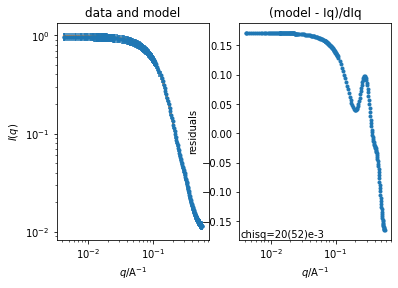

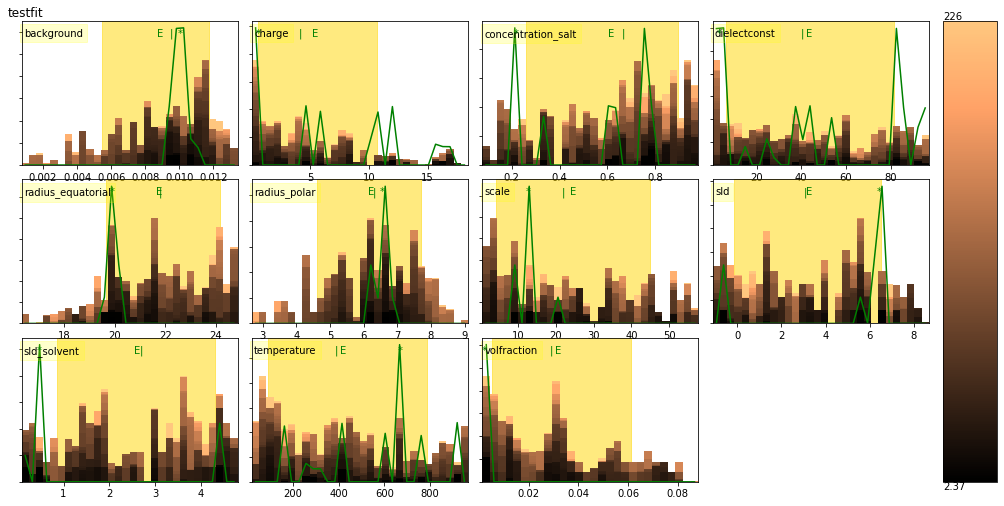

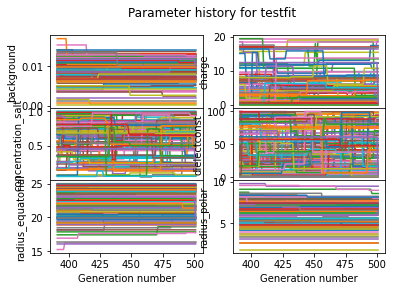

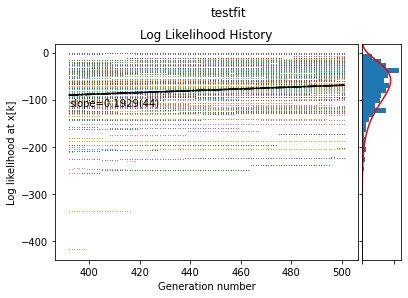

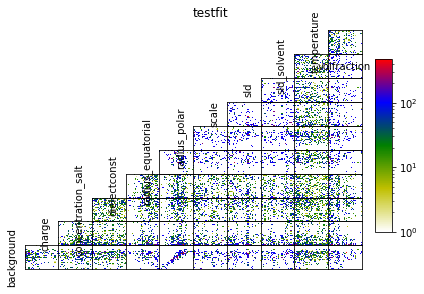

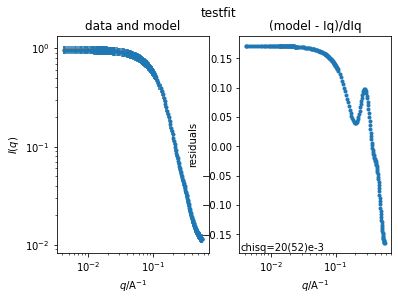

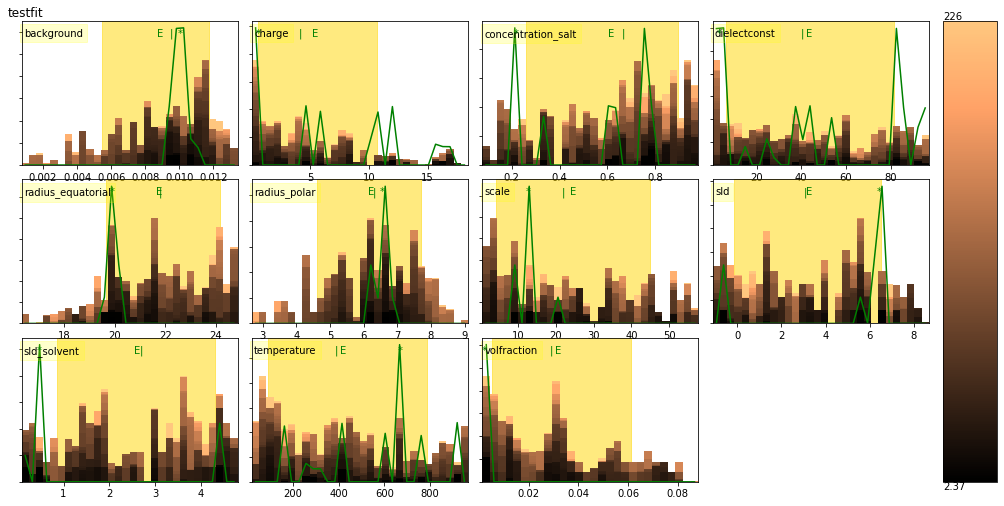

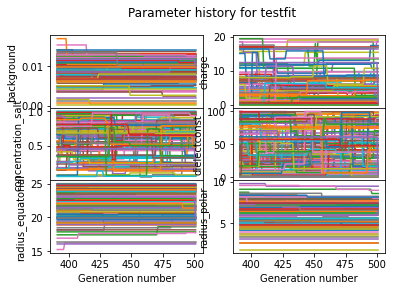

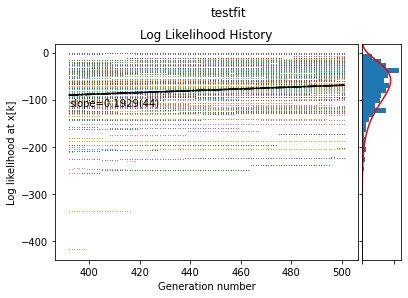

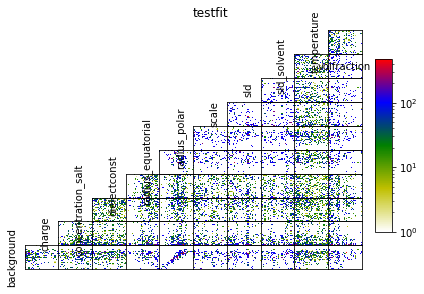

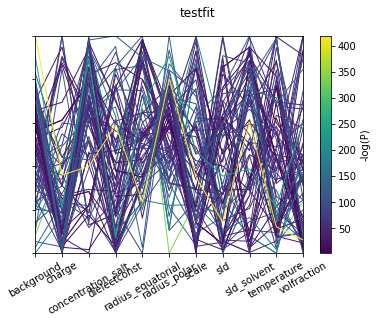

In [12]:
fitobj.Interactor.fnRunMCMC(burn, steps, batch=False)

In [6]:
%%writefile simpar.dat
background 0.0102512
charge 14.76
concentration_salt 0.696339
dielectconst 45.5778
radius_equatorial 19.7316
radius_polar 6.57747
scale  48.1448
sld  8.02574
sld_solvent  1.89502
temperature  409.473
volfraction 0.000497263

Overwriting simpar.dat


In [7]:
fitobj.fnSimulateData(basefilename='testdata.DAT')

background 0.0102512
charge 14.76
concentration_salt 0.696339
dielectconst 45.5778
radius_equatorial 19.7316
radius_polar 6.57747
scale 48.1448
sld 8.02574
sld_solvent 1.89502
temperature 409.473
volfraction 0.000497263


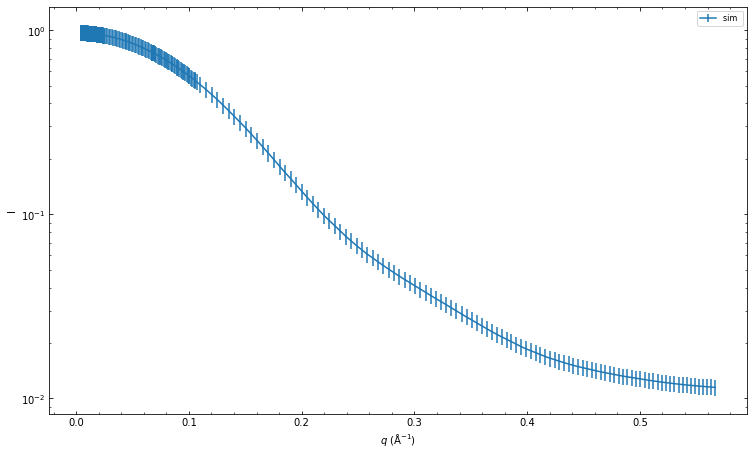

In [8]:
import pandas

fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
simdata = pandas.read_csv('testdata.DAT', sep=' ', skip_blank_lines=True,comment='#')
ax.errorbar(simdata['Q'], simdata['I'], simdata['dI'], label="sim ")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("I", fontsize=10)
ax.set_yscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()
